# Comparaison entrer les projections de SimGen et de certaines données exsistantes

## Effectuer une simulation avec Simgen


In [1]:
import sys
import warnings
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

Pour le moment, il faut changer les chemins pour les répertoires

In [2]:
sys.path.append('/Users/juliennavaux/Dropbox (CEDIA)/OLG_CAN/demo/simgen/')
path_data = '/Users/juliennavaux/Dropbox (CEDIA)/OLG_CAN/demo/Benchmark/'

In [3]:
from simgen import model

On simule la population jusqu'en 2040

In [4]:
base = model(start_yr=2017,stop_yr=2034)
base.startpop('startpopchsld')
base.immig_assumptions(init='newimmpopchsld')
base.birth_assumptions(scenario='reference')
base.dead_assumptions(scenario='medium')

In [5]:
base.simulate(5)

In [6]:
#base.stats.save('simpop.pkl')

In [7]:
base.stats.counts.head()

2017          2018  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  41136.960108  41432.202560   
    True  False none False   0     False  43243.726267  42051.067502   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2019          2020  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  42167.274832  42587.551428   
    True  False none False   0     False  41304.588778  41522.944481   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2021          2022  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  41215.920496  41703.754557   
    True  False none False   0     False  43225.929601  42983.525344   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2023          2024  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  43391.941365  42577.073371   
    True  False none False   0     False  41285.315026  42072.044502   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2025          2026  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  41460.822997  43930.307604   
    True  False none False   0     False  43040.351517  40493.302676   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2027          2028  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  41476.277910  41363.312294   
    True  False none False   0     False  42459.922367  42289.490399   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2029          2030  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  41731.562773  40994.161675   
    True  False none False   0     False  41651.799729  41895.449401   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

                                                  2031          2032  \
age male  insch educ married nkids chsld                               
0   False False none False   0     False  42506.512554  42085.812648   
    True  False none False   0     False  40369.081801  40728.379180   
1   False False dec  False   0     False      0.000000      0.000000   
                                   True       0.000000      0.000000   
                             1     False      0.000000      0.000000   

          

## Extraction des résultats
Creation de "DataFrame" contenant la population totale par sexe

In [8]:
pop =base.stats.freq()
pop_m=base.stats.freq(sub='male==True')
pop_f=base.stats.freq(sub='male==False')

Creation de "DataFrame" contenant la populaton par groupe d'âge

In [9]:
pop_age=base.stats.freq('age')
bins=[-1,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,101]
bins_3=[-1,5,17,35, 101]
pop_age_gr=base.stats.freq('age', bins=bins)
pop_age_gr.columns= pop_age_gr.columns.astype('str')
pop_age_gr3=base.stats.freq('age', bins=bins_3)
pop_age_gr3.columns= pop_age_gr3.columns.astype('str')

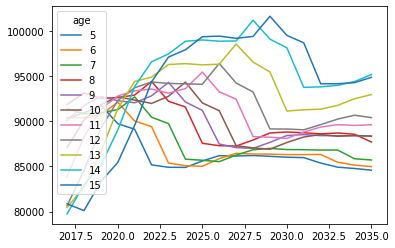

In [10]:
base.stats.freq('age', sub="age>=5 and age<=15 and insch==True").plot()

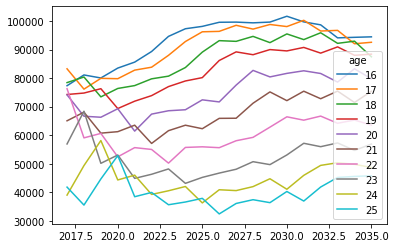

In [11]:
base.stats.freq('age', sub="age>15 and age<=25 and insch==True").plot()

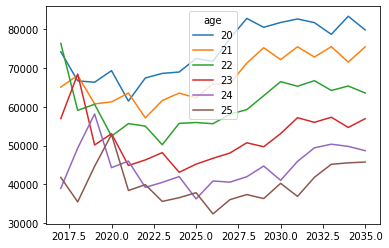

In [12]:
base.stats.freq('age', sub="age>19 and age<=25 and insch==True").plot()

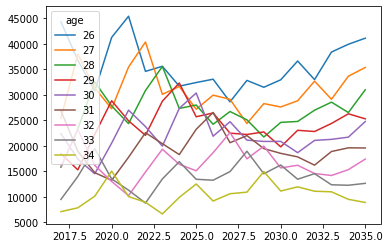

In [13]:
base.stats.freq('age', sub="age>25 and age<=34 and insch==True").plot()

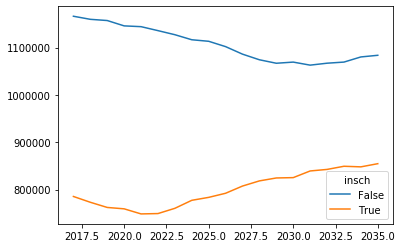

In [14]:
base.stats.freq('insch', sub="age>16 and age<=35").plot()

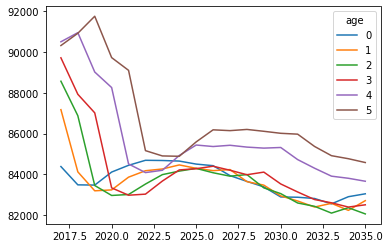

In [15]:
base.stats.freq('age', sub="age<=5").plot()

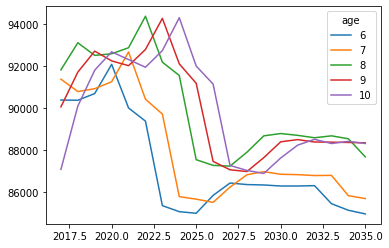

In [16]:
base.stats.freq('age', sub="age>=6 and age<=10").plot()

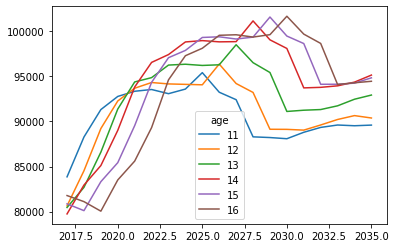

In [17]:
base.stats.freq('age', sub="age>=11 and age<=16").plot()

On charge ici les données provenant des derninères projections de l'ISQ. 

Il s'agit de projections de population basées sur le scénario moyen de l'ISQ à partir des données corrigées du recensement de 2016. Pour plus d'information concernant la méthodologie utilisée pour le calcul des projections de population, veuillez-vous référer au rapport « Perspectives démographiques du Québec et des régions, 2016-2066, édition 2019 » produit par l'ISQ à l'adresse suivante :

https://www.stat.gouv.qc.ca/statistiques/population-demographie/perspectives/perspectives-2016-2066.pdf

Pour la population de 1996-2018, il s'agit d'estimations de population constituant une série historique de populations comparables ayant servi à la construction des projections de population basées sur le recensement de 2016.

In [18]:
pop_isq = pd.read_csv(path_data+'isq_pop_age_1996_2041.csv', sep=';')
pop_isq = pop_isq.set_index('year')

Population totale par âge sexe

In [19]:
pop_isq_age = pop_isq.drop(['total'],axis=1)
pop_isq_age_tot=pop_isq_age.loc[pop_isq['sex']=='all']
pop_isq_age_tot_m=pop_isq_age.loc[pop_isq['sex']=='male']
pop_isq_age_tot_f=pop_isq_age.loc[pop_isq['sex']=='female']
pop_isq_age_tot = pop_isq_age_tot.drop(['sex'],axis=1)
pop_isq_age_tot_m = pop_isq_age_tot_m.drop(['sex'],axis=1)
pop_isq_age_tot_f = pop_isq_age_tot_f.drop(['sex'],axis=1)

Population par groupe d'âge

In [20]:
pop_isq_age_tot_trans = pop_isq_age_tot.T
pop_isq_age_tot_trans
pop_isq_age_tot_trans['age']= range(0,91)
bins=list(range(0,96,5))
bins_3=[0,25,65,91]
pop_isq_age_tot_trans['agegr'] = pd.cut(pop_isq_age_tot_trans['age'], bins=bins, right=False)
gr=pop_isq_age_tot_trans.groupby(['agegr']).sum()
pop_isq_agegr_tot=gr.drop(['age'],axis=1).T
pop_isq_agegr_tot.columns= pop_isq_agegr_tot.columns.astype('str')
pop_isq_agegr_tot = pop_isq_agegr_tot[pop_isq_agegr_tot.index>=2017]
pop_isq_age_tot_trans['agegr'] = pd.cut(pop_isq_age_tot_trans['age'], bins=bins_3, right=False)
gr=pop_isq_age_tot_trans.groupby(['agegr']).sum()
pop_isq_agegr3_tot=gr.drop(['age'],axis=1).T
pop_isq_agegr3_tot.columns= pop_isq_agegr3_tot.columns.astype('str')
pop_isq_agegr3_tot = pop_isq_agegr3_tot[pop_isq_agegr3_tot.index>=2017]

Population totale par sexe

In [21]:
pop_isq_total=pop_isq.loc[pop_isq['sex']=='all']
pop_isq_total =pop_isq_total['total']
pop_isq_total_m = pop_isq.loc[pop_isq['sex']=='male']
pop_isq_total_m =pop_isq_total_m['total']
pop_isq_total_f = pop_isq.loc[pop_isq['sex']=='female']
pop_isq_total_f =pop_isq_total_f['total']

# Population totale

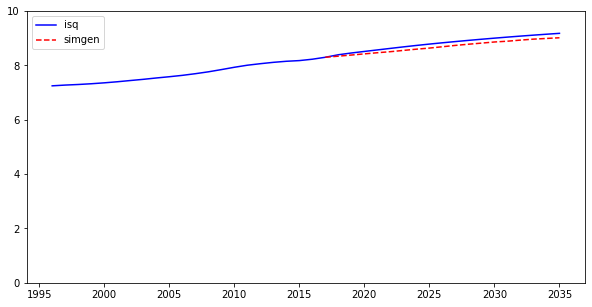

In [29]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_total[pop_isq_total.index<=2035]/1e6, label='isq', color='blue')
plt.plot(pop/1e6, label='simgen', linestyle='dashed', color='red')
plt.legend()
plt.ylim(0, 10)
plt.show()

# Population par niveau d'éducation

In [78]:
none = base.stats.freq('educ', sub="educ=='none'and age>=25 and age<=64 and insch==False")
des = base.stats.freq('educ', sub="educ=='des'and age>=25 and age<=64 and insch==False")
dec = base.stats.freq('educ', sub="educ=='dec'and age>=25 and age<=64 and insch==False")
uni = base.stats.freq('educ', sub="educ=='uni'and age>=25 and age<=64 and insch==False")

In [79]:
tot = uni.loc[:,'uni']+ dec.loc[:,'dec'] + des.loc[:,'des'] + none.loc[:,'none']

In [80]:
del tot[2017]
del tot[2018]
del tot[2019]

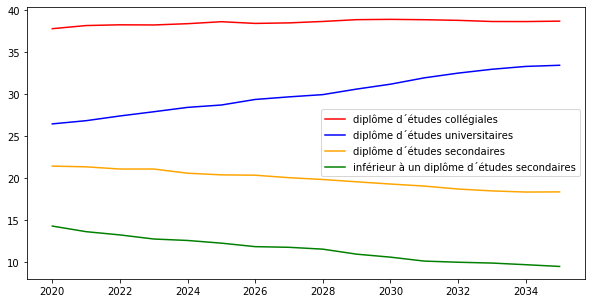

In [81]:
plt.figure(figsize=(10,5))
plt.plot(dec.loc[:,'dec']/tot*100, label='diplôme d´études collégiales', color='red')
plt.plot(uni.loc[:,'uni']/tot*100, label='diplôme d´études universitaires', color='blue')
plt.plot(des.loc[:,'des']/tot*100, label='diplôme d´études secondaires', color='orange')
plt.plot(none.loc[:,'none']/tot*100, label='inférieur à un diplôme d´études secondaires', color='green')
plt.legend()

In [82]:
uni.loc[:,'uni']/tot

2017         NaN
2018         NaN
2019         NaN
2020    0.264664
2021    0.268481
2022    0.274100
2023    0.279136
2024    0.284341
2025    0.287172
2026    0.293784
2027    0.296873
2028    0.299556
2029    0.306154
2030    0.311993
2031    0.319548
2032    0.325194
2033    0.329776
2034    0.333164
2035    0.334537
dtype: float64

In [83]:
(des.loc[:,'des']+none.loc[:,'none'])/tot

2017         NaN
2018         NaN
2019         NaN
2020    0.357181
2021    0.349625
2022    0.343125
2023    0.338268
2024    0.331539
2025    0.326366
2026    0.321775
2027    0.318046
2028    0.313667
2029    0.304935
2030    0.298728
2031    0.291596
2032    0.286712
2033    0.283514
2034    0.280191
2035    0.278309
dtype: float64

In [84]:
dec.loc[:,'dec']/tot

2017         NaN
2018         NaN
2019         NaN
2020    0.378155
2021    0.381894
2022    0.382775
2023    0.382596
2024    0.384120
2025    0.386462
2026    0.384441
2027    0.385081
2028    0.386777
2029    0.388910
2030    0.389279
2031    0.388856
2032    0.388094
2033    0.386710
2034    0.386645
2035    0.387154
dtype: float64

# Population par classes d'âge

In [85]:
jeunes = base.stats.freq(sub="age>=0 and age<=24")
actifs = base.stats.freq(sub="age>=25 and age<=64")
vieux = base.stats.freq(sub="age>=65 and age<=1000")

In [86]:
tot = jeunes + actifs + vieux

In [87]:
del tot[2017]
del tot[2018]
del tot[2019]

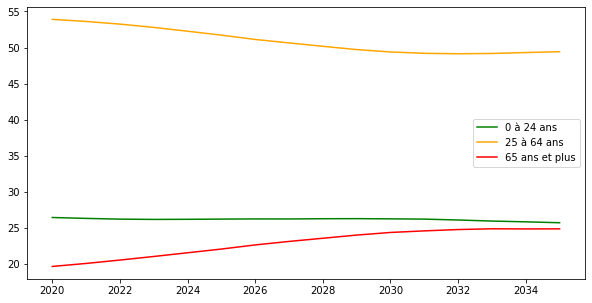

In [88]:
plt.figure(figsize=(10,5))
plt.plot(jeunes/tot*100, label='0 à 24 ans', color='green')
plt.plot(actifs/tot*100, label='25 à 64 ans', color='orange')
plt.plot(vieux/tot*100, label='65 ans et plus', color='red')
plt.legend()

In [89]:
vieux/tot*100

2017          NaN
2018          NaN
2019          NaN
2020    19.656554
2021    20.072930
2022    20.541218
2023    21.038257
2024    21.553243
2025    22.066913
2026    22.639347
2027    23.123530
2028    23.562847
2029    24.004810
2030    24.365865
2031    24.586769
2032    24.771885
2033    24.875891
2034    24.856204
2035    24.866624
dtype: float64

In [90]:
actifs/tot*100

2017          NaN
2018          NaN
2019          NaN
2020    53.902871
2021    53.611123
2022    53.244131
2023    52.786667
2024    52.256796
2025    51.714876
2026    51.117056
2027    50.638498
2028    50.166513
2029    49.712862
2030    49.381511
2031    49.196400
2032    49.135894
2033    49.175777
2034    49.304751
2035    49.417619
dtype: float64

In [91]:
vieux/actifs

2017    0.336555
2018    0.344237
2019    0.353545
2020    0.364666
2021    0.374417
2022    0.385793
2023    0.398552
2024    0.412449
2025    0.426703
2026    0.442892
2027    0.456639
2028    0.469693
2029    0.482869
2030    0.493421
2031    0.499768
2032    0.504150
2033    0.505857
2034    0.504134
2035    0.503193
dtype: float64